In [33]:
import math
import statistics
import numpy as np
import scipy.stats
import pandas as pd
import matplotlib as plt


In [4]:
x = [8.0,1,2.5,4,28.0]
x_with_nan = [8.0,1,2.5,math.nan,4,28.0]
print(x)
print(x_with_nan)

[8.0, 1, 2.5, 4, 28.0]
[8.0, 1, 2.5, nan, 4, 28.0]


In [5]:
y, y_with_nan = np.array(x), np.array(x_with_nan)
z, z_with_nan = pd.Series(), pd.Series(x_with_nan)

print(y)
print(z_with_nan)

[ 8.   1.   2.5  4.  28. ]
0     8.0
1     1.0
2     2.5
3     NaN
4     4.0
5    28.0
dtype: float64


C:\Users\user\AppData\Local\Temp\ipykernel_10192\2014234060.py:2: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  z, z_with_nan = pd.Series(), pd.Series(x_with_nan)


In [6]:
mean_ = statistics.mean(x)
print(mean_)

8.7


In [7]:
mean = statistics.mean(x_with_nan)
print(mean)

nan


In [8]:
mean = y.mean()
print(mean)

8.7


In [9]:
print(np.mean(y_with_nan))
print(y_with_nan.mean())

nan
nan


In [10]:
np.nanmean(y_with_nan)

8.7

In [11]:
mean = z.mean()
mean_

8.7

In [12]:
z_with_nan.mean()

8.7

# weighted Mean

In [13]:
x = [8.0,1,2.5,4,28.0]
w = [0.1,0.1,0.3,0.25,0.15]

wmean = sum(w[i] * x[i] for i in range(len(x)))/sum(w)
print(wmean)

7.611111111111111


In [14]:
y,z,w = np.array(x), pd.Series(x), np.array(w)

wmean = np.average(y, weights=w)
print(wmean)

7.611111111111111


# Harmonic Mean

In [15]:
hmean = len(x)/sum(1/item for item in x)
hmean

2.7613412228796843

In [16]:
statistics.harmonic_mean(x)


2.7613412228796843

In [17]:
scipy.stats.hmean(x)

2.7613412228796843

# Geometry mean

In [18]:
gmean = 1

for item in x:
    gmean*= item
    
gmean **= 1/len(x)
gmean

4.677885674856041

In [19]:
statistics.geometric_mean(x)

4.67788567485604

In [20]:
scipy.stats.gmean(x)

4.67788567485604

# Median

In [21]:
n = len(x)

if n%2:
    median_ = sorted(x)[round(0.5*(n-1))]
else:
    x_ord, index = sorted = sorted(x), round(0.5*n)
    median_ = 0.5*(x_ord[index-1] + x_ord[index])

median_

4

In [22]:
statistics.median(x_with_nan)

6.0

In [23]:
statistics.median_low(x_with_nan)

4

# mode

In [24]:
u = [2,3,2,8,12]
v = [12,15,12,15,21,15,12]

mode_ = max((u.count(item), item) for item in set(u))[1]
mode_

2

# skew

In [25]:
x = [8.0,1,2.5,4,28.0]
n = len(x)

mean_ = sum(x)/n
var_ = sum((item-mean_)**2 for item in x)/(n-1)
std_ = var_**0.5

skew_ = (sum((item-mean_)**3 for item in x)*n/((n-1)*(n-2)*std_**3))

In [26]:
skew_

1.9470432273905929

In [27]:
y,y_with_nan = np.array(x), np.array(x_with_nan)
scipy.stats.skew(y, bias=False)

1.9470432273905927

In [28]:
z_with_nan.skew()

1.9470432273905924

In [29]:
scipy.stats.skew(y_with_nan, bias=False)

nan

In [30]:
z, z_with_nan = pd.Series(x), pd.Series(x_with_nan)

z.skew()

1.9470432273905924

In [31]:
z_with_nan.skew()

1.9470432273905924

# boxplot


In [36]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

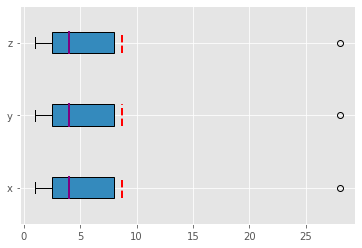

In [37]:
fig, ax = plt.subplots()
ax.boxplot((x, y, z), vert=False, showmeans=True, meanline=True,           labels=('x', 'y', 'z'), patch_artist=True,           medianprops={'linewidth': 2, 'color': 'purple'},           meanprops={'linewidth': 2, 'color': 'red'})
plt.show()

# Histogram

NameError: name 'bin_edges' is not defined

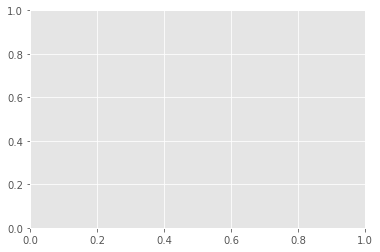

In [38]:
fig, ax = plt.subplots()
ax.hist(x, bin_edges, cumulative=False)
ax.set_xlabel('x')
ax.set_ylabel('Frequency')
plt.show()

In [43]:
hist, bin_edges = np.histogram(x, bins = 10)

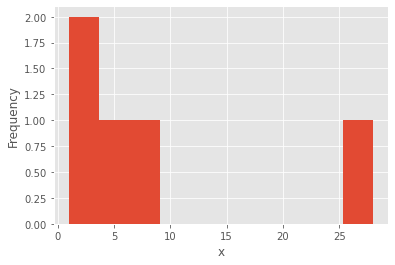

In [44]:
fig, ax = plt.subplots()
ax.hist(x, bin_edges, cumulative=False)
ax.set_xlabel('x')
ax.set_ylabel('Frequency')
plt.show()

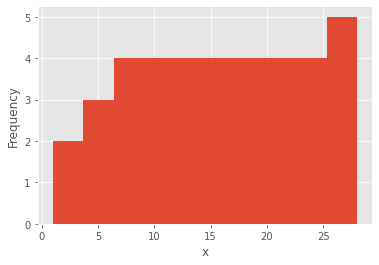

In [45]:
fig, ax = plt.subplots()
ax.hist(x, bin_edges, cumulative=True)
ax.set_xlabel('x')
ax.set_ylabel('Frequency')
plt.show()

# pie chart

In [46]:
x, y, z = 128, 256, 1024

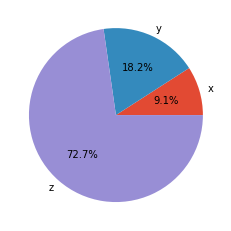

In [47]:
fig, ax = plt.subplots()
ax.pie((x, y, z), labels=('x', 'y', 'z'), autopct='%1.1f%%')
plt.show()

# bar chart

In [49]:
x = np.arange(21)
y = np.random.randint(21, size=21)
err = np.random.randn(21)

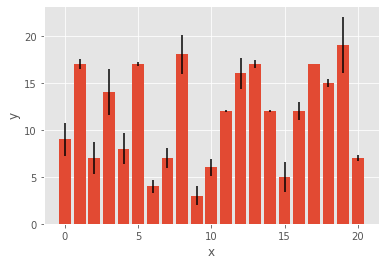

In [51]:
fig, ax = plt.subplots()
ax.bar(x, y, yerr=err)
ax.set_xlabel('x')
ax.set_ylabel('y')
plt.show()

# x-y plot

In [53]:

x = np.arange(21)
y = 5 + 2 * x + 2 * np.random.randn(21)
slope, intercept, r, *__ = scipy.stats.linregress(x, y)
line = f'Regression line: y={intercept:.2f}+{slope:.2f}x, r={r:.2f}'

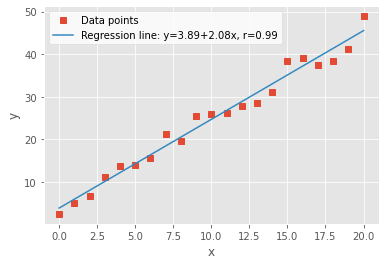

In [54]:
fig, ax = plt.subplots()
ax.plot(x, y, linewidth=0, marker='s', label='Data points')
ax.plot(x, intercept + slope * x, label=line)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.legend(facecolor='white')
plt.show()

# heatmaps

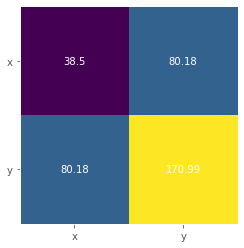

In [58]:
matrix = np.cov(x, y).round(decimals=2)
fig, ax = plt.subplots()
ax.imshow(matrix)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('x', 'y'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('x', 'y'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, matrix[i, j], ha='center', va='center', color='w')
plt.show()

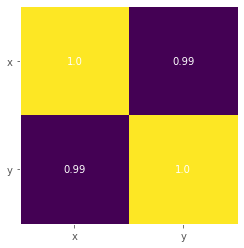

In [59]:
matrix = np.corrcoef(x, y).round(decimals=2)
fig, ax = plt.subplots()
ax.imshow(matrix)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('x', 'y'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('x', 'y'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, matrix[i, j], ha='center', va='center', color='w')
plt.show()